In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!ls "/content/gdrive/MyDrive/AIML/Projects/NLP1"

blogtext.csv


**1. Import and analyse the data set.**

In [ ]:
#reading the Data
blog_df = pd.read_csv("/content/gdrive/MyDrive/AIML/Projects/NLP1/blogtext.csv")


In [ ]:
#Shape of data
blog_df.shape

(681284, 7)

In [ ]:
#print first five rows
blog_df.sample(5)

,id,gender,age,topic,sign,date,text
541925,1498713,female,23,Non-Profit,Sagittarius,"15,May,2004",Under the Tuscan Sun : I started off ...
499689,3609229,female,23,indUnk,Aquarius,"28,July,2004",We went to the old city today in our sm...
342692,896714,female,23,Arts,Scorpio,"05,March,2003",well spring break is coming up. p....
437457,1500723,male,23,Technology,Cancer,"14,March,2004",:-))... 'You see I am black. I ...
280343,958176,male,17,Non-Profit,Gemini,"02,June,2004","O yeah, that's the one. Thx. Okie, a..."


In [ ]:
#Limiting the data and using fewer rows as the data size is large
#blog_df = blog_df.head(100000)

blog_df = pd.read_csv("/content/gdrive/MyDrive/AIML/Projects/NLP1/blogtext.csv",nrows=100000)
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [ ]:
#check if the last 5 rows of the data frame using the tail() method
blog_df.tail()

,id,gender,age,topic,sign,date,text
99995,1709399,male,27,Student,Virgo,"18,September,2003",THE HINDU - 125 YEARS ...
99996,1709399,male,27,Student,Virgo,"16,September,2003",DILBERT & IIT-ans ...
99997,1709399,male,27,Student,Virgo,"12,September,2003",Case Study : How HP won $3 billion...
99998,1709399,male,27,Student,Virgo,"09,September,2003",Championing Chennai ...
99999,1709399,male,27,Student,Virgo,"05,September,2003",WEEKEND It...


In [ ]:
#get more information about data
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      100000 non-null  int64 
 1   gender  100000 non-null  object
 2   age     100000 non-null  int64 
 3   topic   100000 non-null  object
 4   sign    100000 non-null  object
 5   date    100000 non-null  object
 6   text    100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


In [ ]:
# Count Values of column gender
blog_df.gender.value_counts()

male      53358
female    46642
Name: gender, dtype: int64

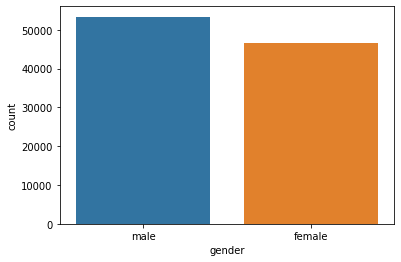

In [ ]:
sns.countplot(x='gender',data=blog_df)

In [ ]:
#checking null values 
blog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

**2 Perform data pre-processing on the data:**
*  Remove unwanted characters
*   Remove unwanted spaces

*   Remove stopwords
*   Convert text to lowercase




In [ ]:
# remove unwanted chars other than alphanumeric
pattern = "[^\w ]"
blog_df.text = blog_df.text.apply(lambda s : re.sub(pattern,"",s))

In [ ]:
#remove unwanted spaces
blog_df.text = blog_df.text.apply(lambda s: s.strip())

In [ ]:
#remove stopwords
stopwords=set(stopwords.words('english'))

AttributeError: ignored

In [ ]:
blog_df.text = blog_df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [ ]:
#covert text to lower
blog_df.text = blog_df.text.apply(lambda s: s.lower())

In [ ]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


In [ ]:
# drop id and date columns
blog_df.drop(labels=['id','date'], axis=1,inplace=True)



*   Target/label merger and transformation



In [ ]:
blog_df['labels'] = blog_df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [ ]:
#drop  gender,age,topic & sign as they are already merged to labels column
blog_df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [ ]:
blog_df.head()

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"




*  Train and test split




In [ ]:
X= blog_df.text
y = blog_df.labels

In [ ]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(80000,)
(80000,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(20000,)
(20000,)


In [ ]:
X_test

6448                      bird buries head mashed potatoes
50680    ok seriously ruined day like mad right wouldnt...
814      astro vs braves got back minute maid stadium d...
20354    greetings welcome first ever blog concept behi...
49224    walks door room always brightens perfect figur...
                               ...                        
47661    hey cool jo problem understandable sounds lots...
56256    last night went see new harry potter movie hon...
92555    urllink instant messages come bearing malice i...
36328    srajan gamers sections class 8th entered compu...
73345    monqiue got back together wasnt quite dramatic...
Name: text, Length: 20000, dtype: object



*   Vectorisation, etc.




In [ ]:
cvect = CountVectorizer(ngram_range=(1,2))

In [ ]:
#Feed SMS data to CountVectorizer
cvect.fit(X_train)

#Check the vocablury size
len(cvect.vocabulary_)

4517076

In [ ]:
cvect.get_feature_names()

['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning',
 '00 really',
 '00 silver',
 '00 sometimes',
 '00 soooooo',
 '00 sq',
 '00 tcr1',
 '00 tie',
 '00 uppercase_75_100',
 '00 watch',
 '00 well',
 '000',
 '000 address',
 '000 available',
 '000 best',
 '000 calories',
 '000 cheaper',
 '000 comptes',
 '000 could',
 '000 duration',
 '000 et',
 '000 first',
 '000 ft',
 '000 fulltime',
 '000 good',
 '000 heh',
 '000 leaving',
 '000 nothing',
 '000 odd',
 '000 people',
 '000 pounds',
 '000 rupees',
 '000 seats',
 '000 sec',
 '000 seems',
 '000 straight',
 '000 subject',
 '000 thats',
 '000 years',
 '000 yen',
 '0000',
 '0000 arent',
 '0000 blinking',
 '0000 hopefully',
 '0000 hrs',
 '0000 new',
 '0000 showed',
 '0000 still',
 '0000 subject',
 '000000',
 '000000 flickrframe',
 '000000 fontfamily',
 '000000 zero',
 '000000000000000000000000167',
 '000000000000000000000000167 grams',
 '000000000000000000000section',
 '0000

In [ ]:
X_train_ct = cvect.transform(X_train)

In [ ]:
X_train_ct[0]

<1x4517076 sparse matrix of type '<class 'numpy.int64'>'
	with 483 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_ct = cvect.transform(X_test)

In [ ]:
X_test_ct

<20000x4517076 sparse matrix of type '<class 'numpy.int64'>'
	with 2633973 stored elements in Compressed Sparse Row format>

In [ ]:
cvect.get_feature_names()[:10]

['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning']

In [ ]:
label_counts=dict()

for labels in blog_df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [ ]:
label_counts

{'13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 '47': 1,
 '48': 1,
 'Accounting': 528,
 'Advertising': 766,
 'Agriculture': 168,
 'Aquarius': 9050,
 'Architecture': 83,
 'Aries': 10637,
 'Arts': 5031,
 'Automotive': 124,
 'Banking': 354,
 'Biotech': 324,
 'BusinessServices': 626,
 'Cancer': 9253,
 'Capricorn': 8723,
 'Chemicals': 305,
 'Communications-Media': 2830,
 'Construction': 250,
 'Consulting': 905,
 'Education': 5553,
 'Engineering': 2332,
 'Environment': 6,
 'Fashion': 1898,
 'Gemini': 9225,
 'Government': 2055,
 'HumanResources': 209,
 'Internet': 2251,
 'InvestmentBanking': 244,
 'Law': 360,
 'LawEnforcement-Security': 368,
 'Leo': 8230,
 'Libra': 7250,
 'Manufacturing': 542,
 'Maritime': 59,
 'Marketing': 726,
 'Military': 798,
 'Museums-Libraries': 308,
 'Non-Profit': 1326,
 'Pisces'



*   Transform the labels




In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [ ]:
y_train = binarizer.fit_transform(y_train)

In [ ]:
y_test = binarizer.transform(y_test)

**3. Design, train, tune and test the best text classifier.**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
Y_pred=model.predict(X_test_ct)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))

In [ ]:
display_metrics_micro(y_test,Y_pred)

Accuracy score:  0.10805
F1 score: Micro 0.47957403627988643
Average precision score: Micro 0.29041532170720996
Average recall score: Micro 0.35051666666666664


In [ ]:
display_metrics_macro(y_test,Y_pred)

Accuracy score:  0.10805
F1 score: Macro 0.15647784738937287
Average recall score: MAcro 0.10398988804281853


In [ ]:
display_metrics_weighted(y_test,Y_pred)

Accuracy score:  0.10805
F1 score: weighted 0.4380968215447316
Average precision score: weighted 0.3902526112805027
Average recall score: weighted 0.35051666666666664


**5. Print the true vs predicted labels for any 5 entries from the dataset.**

In [ ]:
preds = Y_pred[:15]
actuals = y_test[:15]

In [ ]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

[('Aries', 'Fashion', 'male'),
 ('Libra', 'Student', 'male'),
 ('Sagittarius', 'indUnk', 'male'),
 ('Aquarius', 'indUnk', 'male'),
 ('Cancer', 'Student', 'male'),
 ('Pisces', 'Transportation', 'male'),
 ('Arts', 'Capricorn', 'female'),
 ('Capricorn', 'Student', 'male'),
 ('Cancer', 'Religion', 'male'),
 ('Libra', 'indUnk', 'male'),
 ('Aquarius', 'female', 'indUnk'),
 ('Capricorn', 'Consulting', 'female'),
 ('Virgo', 'indUnk', 'male'),
 ('Internet', 'Sagittarius', 'male'),
 ('Scorpio', 'Technology', 'male')]

In [ ]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[(),
 ('Student', 'female'),
 (),
 ('male',),
 ('Cancer', 'female'),
 ('Pisces', 'Transportation', 'male'),
 ('female',),
 ('Student',),
 ('Religion', 'female'),
 ('male',),
 ('female',),
 ('Capricorn', 'Consulting', 'female'),
 (),
 ('male',),
 ('Scorpio', 'male')]

In [ ]:
print(binarizer.inverse_transform(Y_pred)[877])
print(binarizer.inverse_transform(y_test)[877])

('Student', 'Virgo', 'male')
('Student', 'Virgo', 'male')


In [ ]:
print(binarizer.inverse_transform(Y_pred)[514])
print(binarizer.inverse_transform(y_test)[514])

()
('Libra', 'female', 'indUnk')


In [ ]:
print(binarizer.inverse_transform(Y_pred)[99])
print(binarizer.inverse_transform(y_test)[99])

('Cancer', 'Education', 'Pisces', 'male')
('Education', 'Pisces', 'male')


In [ ]:
print(binarizer.inverse_transform(Y_pred)[499])
print(binarizer.inverse_transform(y_test)[499])

('male',)
('Pisces', 'Student', 'female')


In [ ]:
print(binarizer.inverse_transform(Y_pred)[699])
print(binarizer.inverse_transform(y_test)[699])

('Student', 'female')
('Libra', 'Student', 'male')


In [ ]:
import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(Y_pred)))
   
print(j)

for k in j:    
    print(binarizer.inverse_transform(Y_pred)[k])
    print(binarizer.inverse_transform(y_test)[k])

[3154, 19276, 6822, 2101, 15931]
('male',)
('Gemini', 'Manufacturing', 'female')
('Sagittarius', 'indUnk', 'male')
('Arts', 'Taurus', 'male')
('Capricorn', 'Student', 'female')
('Capricorn', 'Student', 'female')
('Technology', 'male')
('Taurus', 'Technology', 'female')
('male',)
('Pisces', 'Science', 'male')


In [ ]:
Ypred_inversed = binarizer.inverse_transform(Y_pred)
y_test_inversed = binarizer.inverse_transform(y_test)
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_ct[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

Text:	  (0, 466872)	1
  (0, 584973)	1
  (0, 584975)	1
  (0, 1781828)	1
  (0, 2442113)	1
  (0, 2442132)	1
  (0, 3036822)	1
True labels:	Aries,Fashion,male
Predicted labels:	


Text:	  (0, 8711)	1
  (0, 9452)	1
  (0, 21144)	1
  (0, 67661)	1
  (0, 67771)	1
  (0, 74496)	1
  (0, 78471)	1
  (0, 120596)	2
  (0, 121772)	1
  (0, 126920)	1
  (0, 157801)	2
  (0, 157893)	1
  (0, 178920)	1
  (0, 182108)	1
  (0, 182417)	1
  (0, 183363)	2
  (0, 194027)	1
  (0, 202361)	5
  (0, 204077)	1
  (0, 205064)	1
  (0, 239970)	1
  (0, 240321)	1
  (0, 241441)	1
  (0, 241749)	1
  (0, 253541)	9
  :	:
  (0, 4449084)	1
  (0, 4449595)	1
  (0, 4449626)	1
  (0, 4450750)	3
  (0, 4451466)	1
  (0, 4451498)	1
  (0, 4452129)	1
  (0, 4456096)	2
  (0, 4456698)	1
  (0, 4463753)	2
  (0, 4464335)	2
  (0, 4469203)	1
  (0, 4469270)	1
  (0, 4471411)	1
  (0, 4490047)	1
  (0, 4490716)	1
  (0, 4497133)	1
  (0, 4497652)	1
  (0, 4499765)	2
  (0, 4500864)	1
  (0, 4501722)	1
  (0, 4503110)	1
  (0, 4503268)	1
  (0, 4505964)	1
  (0, 4506086)






**we have solved Multilabel classification problem that predicts multiple features of the author of a given text**
